<a href="https://colab.research.google.com/github/KimJeonghun91/AWS-Certified-Machine-Learning-Specialty-MLS-C01-Certification-Guide/blob/master/%EB%A8%B8%EC%8B%A0_%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

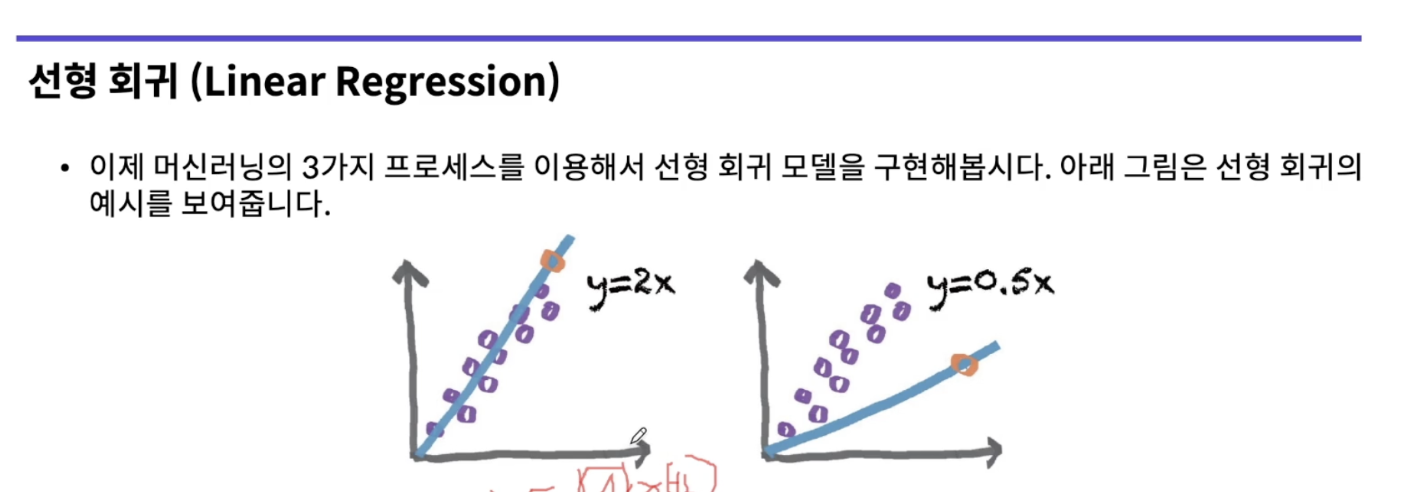

In [ ]:
import tensorflow as tf

W = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))
print('W : ', W)
print('b : ', b)

# 가설 정의 (선형회귀) : x(인풋)을 받아 y(타겟)을 반환
@tf.function
def linear_model(x):
  return W*x + b



# MSE(평균제곱오차) 손실 함수를 정의.
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))



# [[ 최적화 ]] 를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
# (0.01) 러닝 레이트
optimizer = tf.optimizers.SGD(0.01)

# 최적화를 위한 function을 정의합니다.
# *** JH : apply_gradients 를 반복호출해서 처음에 랜덤정의한 값(W,b)을 바꿔주는 것
@tf.function
def train_step(x, y):

  # TensorFlow 는 중간 연산 과정(함수, 연산)을 테이프(tape)에 차곡차곡 기록해주는 Gradient tapes
  with tf.GradientTape() as tape:
    y_pred = linear_model(x)
    loss = mse_loss(y_pred, y)
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))


# 트레이닝을 위한 입력값과 출력값을 준비합니다.
# y = 2x + 0
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 테스트를 위한 입력값을 준비합니다.
x_test = [3.5, 5, 5.5, 6]


# 경사하강법을 n번 수행합니다.
for i in range(50):
  train_step(x_train, y_train)

  ## 학습이 잘되고 있는지 확인
  if i % 2 == 0:
    print('------------------ ', i, ' 반복 결과 ------------------')
    print('[가설] 값 : W : ', W.numpy(), ' / b : ', b.numpy())
    print('[예상] 값 : ', linear_model(x_test).numpy())


# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=2x)을 잘 학습했는지 측정합니다.
# 예상되는 참값 : [7, 10, 11, 12]
print('------------------ 최종 예상 결과 ------------------')
print(linear_model(x_test).numpy())

W :  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.48335093], dtype=float32)>
b :  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.44678432], dtype=float32)>
------------------  0  반복 결과 ------------------
[가설] 값 : W :  [-0.13318752]  / b :  [0.5620162]
[예상] 값 :  [ 0.09585989 -0.10392141 -0.17051518 -0.23710889]
------------------  2  반복 결과 ------------------
[가설] 값 : W :  [0.40201455]  / b :  [0.736352]
[예상] 값 :  [2.143403  2.7464247 2.947432  3.1484394]
------------------  4  반복 결과 ------------------
[가설] 값 : W :  [0.7740843]  / b :  [0.85524905]
[예상] 값 :  [3.5645442 4.725671  5.112713  5.499755 ]
------------------  6  반복 결과 ------------------
[가설] 값 : W :  [1.0329559]  / b :  [0.9356906]
[예상] 값 :  [4.551036  6.10047   6.6169477 7.1334257]
------------------  8  반복 결과 ------------------
[가설] 값 : W :  [1.2132773]  / b :  [0.989461]
[예상] 값 :  [5.2359314 7.0558476 7.662486  8.269125 ]
------------------  10  반복 결과 ------------------
[가설] 값 : W :